In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../DATA/weather.csv')
df.drop(['WESD', "WT01", "WT03", "WT04", "WT05", "WT06", "WT11"], axis=1, inplace=True)
df['date'] = pd.to_datetime(df['DATE'])
start_date = pd.to_datetime('2012-01-01')
df['days_since_2012'] = (df['date'] - start_date).dt.days

df.head(5)

/tmp/ipykernel_99182/424814571.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,STATION,NAME,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,date,days_since_2012
0,USC00441593,"CHARLOTTESVILLE 2 W, VA US",2012-01-01,0.00,0.0,0.0,57.0,36.0,36.0,2012-01-01,0
1,USC00441593,"CHARLOTTESVILLE 2 W, VA US",2012-01-02,0.01,0.0,0.0,58.0,32.0,32.0,2012-01-02,1
2,USC00441593,"CHARLOTTESVILLE 2 W, VA US",2012-01-03,0.00,0.0,0.0,40.0,24.0,24.0,2012-01-03,2
3,USC00441593,"CHARLOTTESVILLE 2 W, VA US",2012-01-04,0.00,0.0,NaN,30.0,16.0,18.0,2012-01-04,3
4,USC00441593,"CHARLOTTESVILLE 2 W, VA US",2012-01-05,0.00,0.0,0.0,37.0,18.0,37.0,2012-01-05,4


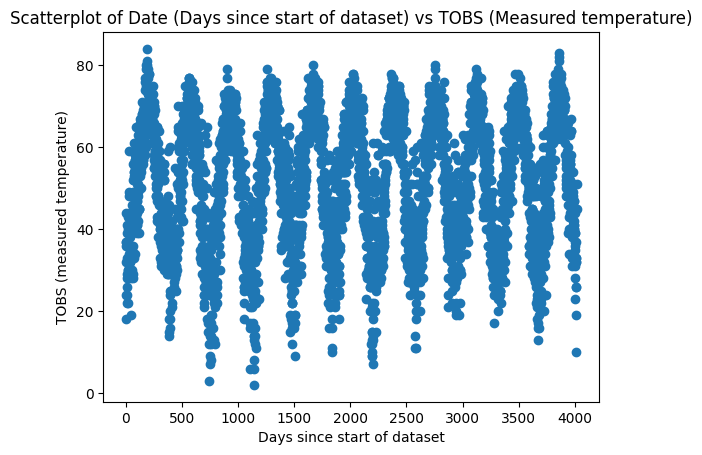

In [2]:
plt.scatter(df['days_since_2012'], df['TOBS'])
plt.xlabel('Days since start of dataset')
plt.ylabel('TOBS (measured temperature)')
plt.title('Scatterplot of Date (Days since start of dataset) vs TOBS (Measured temperature)')
plt.show()

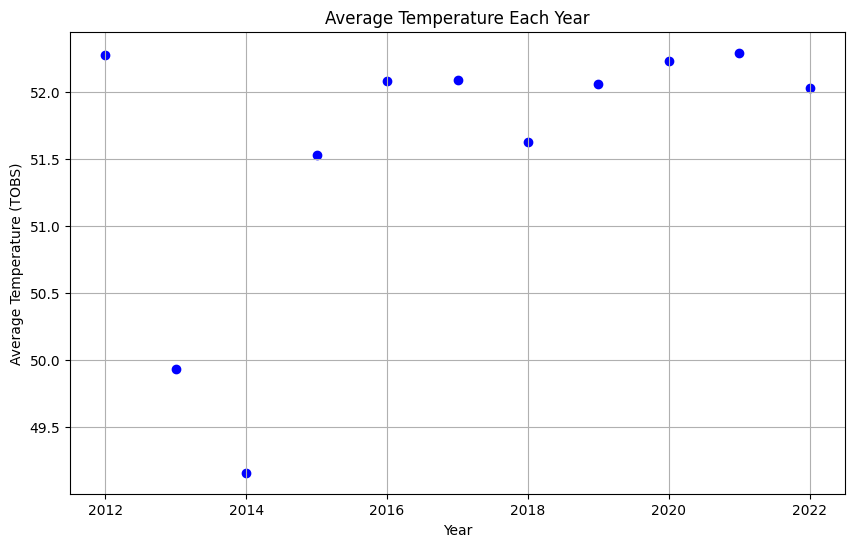

In [3]:
# Extract year from date
df['year'] = df['date'].dt.year

# Group by year and calculate average temperature
average_temp_yearly = df.groupby('year')['TOBS'].mean()

# Plot average temperature each year
plt.figure(figsize=(10, 6))
plt.scatter(average_temp_yearly.index, average_temp_yearly.values, color='blue')
plt.xlabel('Year')
plt.ylabel('Average Temperature (TOBS)')
plt.title('Average Temperature Each Year')
plt.grid(True)
plt.show()